<a href="https://colab.research.google.com/github/FrancoisHUP/TP1_INF889G/blob/main/INF889G_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 INF 889G H24

## Setup


Github link : https://github.com/FrancoisHUP/TP1_INF889G/

In [ ]:
# Pull data from github
import os
import requests

urls = [
  'https://raw.githubusercontent.com/FrancoisHUP/TP1_INF889G/main/data/d1_ex1_im1.jpg',
  'https://raw.githubusercontent.com/FrancoisHUP/TP1_INF889G/main/data/d1_ex1_im2.jpg',
  'https://raw.githubusercontent.com/FrancoisHUP/TP1_INF889G/main/data/d1_ex1_im3.jpg',
  'https://raw.githubusercontent.com/FrancoisHUP/TP1_INF889G/main/data/d1_ex1_im4.jpg',
  'https://raw.githubusercontent.com/FrancoisHUP/TP1_INF889G/main/data/d1_ex1_im5.jpg',
  'https://raw.githubusercontent.com/FrancoisHUP/TP1_INF889G/main/data/d1_ex2.png',
  'https://raw.githubusercontent.com/FrancoisHUP/TP1_INF889G/main/data/d1_ex3.pcl',
  'https://raw.githubusercontent.com/FrancoisHUP/TP1_INF889G/main/annotations.txt'
]

# create data rep
if not os.path.exists('data'):
    os.makedirs('data')

# download images
for url in urls:
  r = requests.get(url)
  filename = url.split('/')[-1]
  with open('data/' + filename, 'wb') as f:
      f.write(r.content)

annotations.txt  d1_ex1_im2.jpg  d1_ex1_im4.jpg  d1_ex2.png
d1_ex1_im1.jpg	 d1_ex1_im3.jpg  d1_ex1_im5.jpg  d1_ex3.pcl


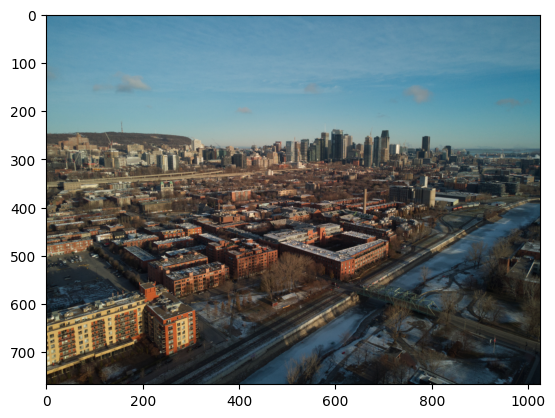

In [ ]:
# plot image
import matplotlib.pyplot as plt
from PIL import Image

!ls data
plt.imshow(Image.open('data/d1_ex1_im1.jpg'))
plt.show()

## Exercice 1 : High Dynamic Range (HDR) (5 pts)

a) Soit une série d’images d’une même scène acquises pour différents niveaux d’exposition. Expliquez la différence d’apparence entre ces images, en mentionnant les régions sous-exposées et surexposées.

In [ ]:
# TODO

b) Proposez et implémentez un algorithme de traitement d’images qui détecte les régions dont l’exposition est ni sous-exposée ni surexposée dans chaque image et qui crée une image synthétique combinant les régions détectées pour chacune. Expliquez vos choix de paramètres pour la fusion d’images.


In [ ]:
# TODO

c) Expliquez le lien entre la grande plage dynamique pour la perception visuelle humaine et la méthode HDR pour la vision par ordinateur.

In [ ]:
# TODO

d) En vous référant à l’article [(Debevec,1997)](https://dl.acm.org/doi/pdf/10.1145/258734.258884), quelle amélioration pourriez-vous apporter à votre approche de synthèse d’image HDR?

In [ ]:
# TODO

## Exercice 2 : Filtrage spatial (5 pts)


### a) Implémentez un filtre moyenneur de tailles 3x3 et 5x5. Appliquez votre filtre à l’image d1_q2.png. Note : vous devez programmer vous-même le déplacement du filtre dans l’image, vous ne devez pas utiliser une méthode existante pour faire la convolution.

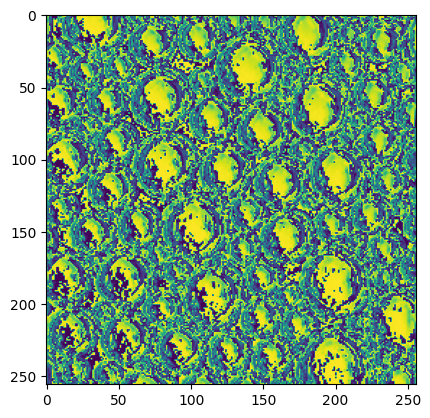

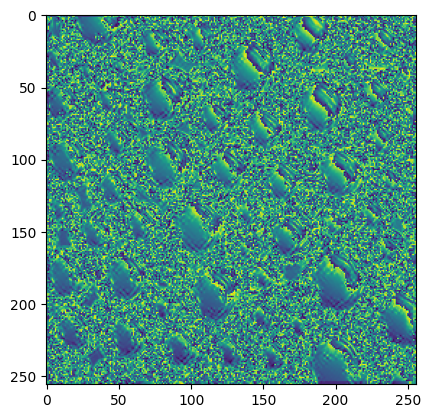

In [ ]:
import numpy as np
import cv2
from PIL import Image
from typing import Optional

def apply_filter(image_path: str,
                 filter_matrix: np.ndarray,
                 padding_type: str,
                 output_path: Optional[str] = None,
                 constant_value: Optional[str] = 0) -> Image.Image :
    """
    This function applies a spatial filter to an image
    :param image_path: path to the image
    :param filter_matrix: the filter to apply
    :param padding_type: the type of padding to apply. Padding available : constant, edge, reflect, wrap
    :param constant_value: the value to use for padding
    :param output_path: path to the output image (optional)
    :return: the processed image
    """
    # Load image
    image = Image.open(image_path)
    image = np.array(image)

    pad_width = filter_matrix.shape[0] // 2

    # Apply padding to the image based on padding_type
    padded_image = np.pad(image, pad_width, mode=padding_type)

    # Initialize the output image
    output_image = np.zeros_like(image)

    # Apply the filter (convolution)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract the region of interest
            region = padded_image[i:i+filter_matrix.shape[0], j:j+filter_matrix.shape[1]]
            # Apply the filter
            output_image[i, j] = np.sum(region * filter_matrix)

    # Convert the output array to an image
    output_image = Image.fromarray(output_image)

    # Save the processed image if output_path is specified
    if output_path is not None:
        output_image.save(output_path)

    return output_image

# Example usage 3X3 matrix
filter_matrix_3X3 = np.array([[0, 0, 0],
                              [1, 0, -1],
                              [0, 0, 0]])  # Example filter (edge detection)

# Exmaple usage 5X5 matrix
filter_matrix_5X5 = np.array([[1, 0, -1, 0, 1],
                              [0, 0, 0, 0, 0],
                              [-1, 0, 2, 0, -1],
                              [0, 0, 0, 0, 0],
                              [1, 0, -1, 0, 1]])

# padding_type = {"constant", "edge", "reflect", "wrap" }
output_3X3 = apply_filter("data/d1_ex2.png", filter_matrix_3X3, "constant")
output_5X5 = apply_filter("data/d1_ex2.png", filter_matrix_5X5, "constant")

plt.imshow(output_3X3)
plt.show()
plt.imshow(output_5X5)
plt.show()

### b) Quelle est la différence entre une corrélation et une convolution?

La convolution et la correlation en traitement d'image est un masque appliqué sur une image pour chaque pixel.

Les formules pour les algorithme sont les suivants.

Convolution :  
![Convolution equation](
https://raw.githubusercontent.com/FrancoisHUP/TP1_INF889G/main/assets/convolution.png "Convolution equation")

Corrélation :  
![Convolution equation](
https://raw.githubusercontent.com/FrancoisHUP/TP1_INF889G/main/assets/correlation.png "Convolution equation")

Où

- f : la matrice 2X2 de l'image,
- h : la matrice 2X2 du Kernel,
- x et y : coordonné dans l'image
- i et j : les nombres de ligne et colone
- a et b : La longueur horizontal et verticalde la matrice divisé par deux au planché.

Donc, f(0,1) est le pixel dans l'array : **img[0][1]**

La différence entre les deux équations c'est le h(x **-** i,y **-** i) qui devient h(x **+** i,y **+** i). Concretement, cela a pour effet d'inversé a l'horizontal et a la vertical la matrice filtre.

**_NOTE:_** Il est important de noté que l'application de ces filtres nécéssite un padding qui est égale à la dimension divisié au planché par 2. Par exemple une matrice de 3X3 aura un padding de padding 1.

Invertion du filtre :  
![Convolution equation](
https://raw.githubusercontent.com/FrancoisHUP/TP1_INF889G/main/assets/inversion_filtre.png "Convolution equation")

Pour des filtres symetriques comme le filtre gaussien, la convolution et la corrélation donne le même résultat.

La convolution est normalement utilisé pour entrainer les reseau de neurone (convolutionnal neural network - CNN)

La corrélation est utile pour de filtre asymétriques pour trouver des formes et charactéristiques d'une image. La direction du filtre est conservé lors de l'application du filtre (kernel).  

Par exemple les filtres de détection des contours (le filtre de Sobel, de Prewitt, Laplacien, etc.) ou les filtres de détection des crètes (meijering, sato, frangi, Hessian, ect.) permettrent de faire ressortir les countours d'un objet dans une image.

Les filtres de corrélation sont utile pour la detection d'objet sans necessairement avoir recours a l'apprentissage machine. Ils sont capable de detecter de objet dans une image en appliquant simplement un algorithme. Par contre, vont bien fonctionner dnas certaine situation, mais il ne peuvent pas etre appliquer pareil partout. Aucun de ces filtres est une solution optimal dans toute les situations. Il ne sont pas capable de généralisé la detection d'objet comme les CNNs sont capable.


### c) Comment pourriez-vous utiliser la corrélation pour détecter des objets simples dans une image? Veuillez suggérer un algorithme qui permettrait de détecter la position du centre de chaque bulle dans l’image d1_q2.png.


TODO faire un cas de base avec seulement HoughCircles basic

TODO Tester avec un filtre custome asymétrique

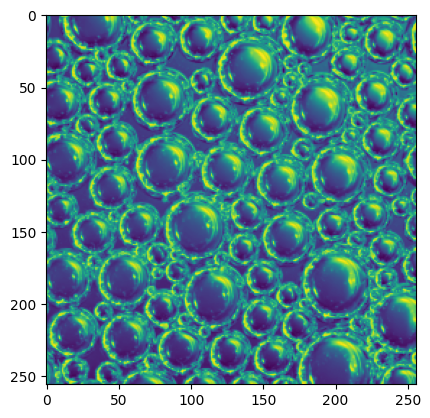

In [ ]:
image = plt.imread('data/d1_ex2.png')
plt.imshow(image)
plt.show()

Cette image contient des bulles en forme de cercle avec plusieurs tons de gris pour un meme cercle. Ce qui rend la detection des cercles plus difficile que des objects bien defini avec un fond uniforme. En plus, les bulles on une reflexion provenant du coin droit haut. Le reflex de la lumiere diminue plus les bulles s'eloigne du coin droit haut.

Pour trouve les centres des objets, le filtre de Canny peut nous aider a faire ressortire les contours des bulle. Hors l'algorithme seule gardera un trop grand niveau de detail a elle seule. Tout les reflets des bulles seront garder et ajouterons du bruit à la detection de cercle.

Pour la detection des cercle, on peut detecter les cercles en placant des points au centre des contours le plus eloigne de chaque contour. L'algorithme [Hough transform](https://www.sciencedirect.com/science/article/abs/pii/0031320381900091) est utilisé pour detecter des cercles.

En testant l'ajout d'un filter gaussien dans le but de reduire le bruit, on remarque une amélioration des résultat comparer. par contre on perd en precision dans l'image. Les ligne de bruit ne sont pas un gros probleme pour l'algorithem HoughCircles

Annotation de l'image

Pour tester la précision des annotations trouvés par notre algorithme, on construit une annotations sur l'image à la main.

Executer le fichier [Annotate_circle.py](https://github.com/FrancoisHUP/TP1_INF889G/blob/main/Annotate_circle.py) sur votre machine local et recupérer le fichier annotations.txt. Puis placer ce fichier dans le repertoire "data/annotations.txt". Le fichier d'annotation est disponible ici : [annotation.txt](https://github.com/FrancoisHUP/TP1_INF889G/blob/main/annotations.txt)

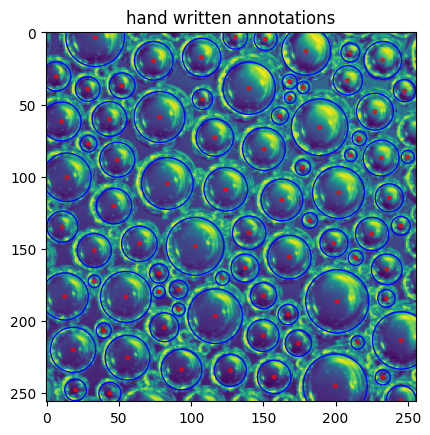

In [ ]:
# plot image with annotations coordinate
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def get_annotations(filename) :
    # Initialize an empty list to store the coordinates
    annotations = []

    # Open the file with the annotations
    with open(filename, 'r') as file:
        # Read each line in the file
        for line in file:
            # Split the line by comma and convert each part to an integer
            x, y, r = line.strip().split(',')
            # Append the coordinate tuple to the annotations list
            annotations.append((float(x), float(y), float(r)))

    # Now annotations contains all the coordinates as tuples
    return annotations

def plot_image_with_annotations(image, annotations, title):
    fig, ax = plt.subplots(1)
    ax.imshow(image)
    ax.set_title(title)
    # width, height = image.shape
    for anno in annotations:
        # user circle as point
        inner_circle = patches.Circle((anno[0], anno[1]), radius=1, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(inner_circle)
        outer_circle = patches.Circle((anno[0], anno[1]), radius=anno[2], linewidth=1, edgecolor='b', facecolor='none')
        ax.add_patch(outer_circle)
    plt.show()

# Show annotations
annotations = get_annotations('data/annotations.txt')
image = plt.imread('data/d1_ex2.png')

image_width, image_height = image.shape
# Adjust annotations to image size
annotations = [
    (width * image_width, height * image_height, radius * ((image_width + image_height) / 2))
    for width, height, radius in annotations
]

# print shape of image
plot_image_with_annotations(image, annotations, 'hand written annotations')


Puis avec l'annotation à la main et l'annotation automatique, on calcule la différence entre chaque point et on attribut un score à la précision de l'annotation trouvé par l'algorithme

La fonction de comparaison des annotations est basé sur l'algorithme de [Hungarian](https://en.wikipedia.org/wiki/Hungarian_algorithm)

In [ ]:
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
import numpy as np

def calculate_alignment_score(hand_annotations, auto_annotations):
    # Create the cost matrix from all pairs of points
    cost_matrix = cdist(hand_annotations, auto_annotations, 'euclidean')

    # If there are more auto_annotations, we don't need to pad the matrix,
    # but we will handle the penalty for extra points later.
    if len(hand_annotations) > len(auto_annotations):
        # Pad auto_annotations with dummy points at max distance
        max_distance = np.max(cost_matrix) * 2  # Use a very high cost for unmatched points
        padded_auto_annotations = np.pad(auto_annotations, [(0, len(hand_annotations) - len(auto_annotations)), (0, 0)], 'constant', constant_values=max_distance)
        cost_matrix = cdist(hand_annotations, padded_auto_annotations, 'euclidean')

    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    # Retrieve the distances for the optimal assignment
    optimal_distances = cost_matrix[row_ind, col_ind]

    # Normalize distances to a score between 0 and 1
    max_distance = np.max(cost_matrix)
    distance_scores = 1 - (optimal_distances / max_distance)
    distance_scores[distance_scores < 0] = 0  # Ignore negative scores due to padding

    # Calculate the average distance score
    average_distance_score = np.mean(distance_scores)

    # Penalty for point count mismatch
    # This penalty increases as the difference in point counts increases
    point_count_penalty = 1 - abs(len(hand_annotations) - len(auto_annotations)) / max(len(hand_annotations), len(auto_annotations))

    # Final score combines distance score and penalty for point count mismatch
    final_score = average_distance_score * point_count_penalty

    return final_score

Puis on applique notre algorithme pour trouver les centres de forme.

0.9577985702228069


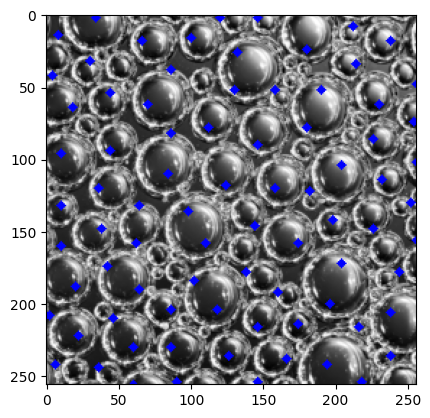

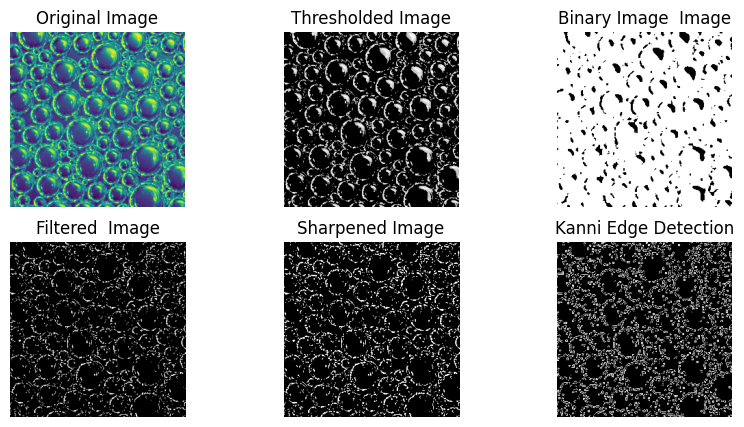

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(input_image):

    global gray
    global thresholded_image
    global blurred_image
    global binary_image
    global filtered_image
    global sharpened
    global edges
    global processed_image

    gray = input_image

    # Flatten the image to a 1D array
    pixels = gray.flatten()

    # Calculate the 90th percentile value
    percentile_80 = np.percentile(pixels, 80)

    # Set pixels with intensity above the 90th percentile to a specific value
    # e.g., setting them to 0 (black)
    thresholded_image = np.where(gray < percentile_80, 0, gray)

    # Replace the image in 2d
    thresholded_image = thresholded_image.reshape(image.shape)

    blurred_image = cv2.medianBlur(thresholded_image, 5)

    plt.imshow(blurred_image)

    # Apply blurred mask onto thresholded_image
    _, binary_image = cv2.threshold(blurred_image, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    binary_image = 1 - binary_image

    # Apply binary mask onto thresholded_image
    filtered_image = thresholded_image * binary_image

    # Sharpen image
    kernel = np.array([[0, -1, 0],
                      [-1, 5, -1],
                      [0, -1, 0]])
    sharpened = cv2.filter2D(filtered_image, -1, kernel)

    edges = cv2.Canny(sharpened, 250, 255)

    return edges

def detect_circle(input_image, hough_circles_params={}) :
    global image_circle
    image_circle = original_image

    # check if all values of hough_circles_params are greater then 0
    for param, value in hough_circles_params.items():
        hough_circles_params[param] = max(1, value)

# 25.98809200696139, 57.4943666930601, 2.7328908097786124, 2, 56.15591163165465
    # Circle detection
    circles = cv2.HoughCircles(input_image, cv2.HOUGH_GRADIENT,
                               dp=hough_circles_params.get("dp", 1.0),
                               minDist=hough_circles_params.get("minDist",25),
                               param1=hough_circles_params.get("param1",57.4943666930601),
                               param2=hough_circles_params.get("param2", 2.7328908097786124),
                               minRadius=hough_circles_params.get("minRadius",  2),
                               maxRadius=hough_circles_params.get("maxRadius", 56))

    # Circle detection
    auto_points = []
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            # cv2.circle(image_circle, (x, y), r, (0, 255, 0), 1)
            auto_points.append((x,y,r))
            cv2.circle(image_circle, (x, y), 1, (0, 0, 255), 3)

    return auto_points

def plot_images() :
    # Plotting
    fig, axs = plt.subplots(2, 3, figsize=(10, 5))

    # Original image
    axs[0][0].imshow(image)
    axs[0][0].set_title("Original Image")
    axs[0][0].axis('off')

    # Blurred image
    axs[0][1].imshow(thresholded_image, cmap='gray')
    axs[0][1].set_title("Thresholded Image")
    axs[0][1].axis('off')

    # Blurred image
    axs[0][2].imshow(binary_image, cmap='gray')
    axs[0][2].set_title("Binary Image  Image")
    axs[0][2].axis('off')

    # Blurred image
    axs[1][0].imshow(filtered_image, cmap='gray')
    axs[1][0].set_title("Filtered  Image")
    axs[1][0].axis('off')

    # Blurred image
    axs[1][1].imshow(sharpened, cmap='gray')
    axs[1][1].set_title("Sharpened Image")
    axs[1][1].axis('off')

    # Edge detection
    axs[1][2].imshow(edges, cmap='gray')
    axs[1][2].set_title("Kanni Edge Detection")
    axs[1][2].axis('off')

    plt.show()

# Load the image
global original_image
original_image = cv2.imread('data/d1_ex2.png')
# processed_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib
gray = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)

# Call the function with the path to your uploaded image
preprocessed_image = preprocess_image(gray)

# Detect circles
auto_points = detect_circle(gray)

plt.imshow(image_circle)

hand_points = np.array(annotations)
auto_points = np.array(auto_points)
score = calculate_alignment_score(hand_points, auto_points)
print(score)

# Plot images
plot_images()

La prochaine section décrit comment optimiser les paramètres de la fonction HoughtCircles

Basé sur un algorithme Génétique.

In [ ]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.7 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
from deap import base, creator, tools, algorithms

def evaluate(individual):
    # Parameters unpacked from the individual
    dp, minDist, param1, param2, minRadius, maxRadius = map(int, individual)

    hough_circles_params= {
        "dp" : dp,
        "minDist":minDist,
        "param1":param1,
        "param2":param2,
        "minRadius":minRadius,
        "maxRadius":maxRadius
    }

    # Detect circles
    auto_points = detect_circle(preprocessed_image, hough_circles_params)

    # Fitness evaluation
    if len(auto_points) :
        hand_points = np.array(annotations)
        auto_points = np.array(auto_points)
        fitness = calculate_alignment_score(hand_points, auto_points)
        print(fitness, hough_circles_params)
    else:
        fitness = 0

    return fitness,

In [ ]:
# Define the fitness and individual classes
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Parameter bounds
DP_BOUNDS = (1, 2)
MINDIST_BOUNDS = (1, 100)
PARAM1_BOUNDS = (1, 100)
PARAM2_BOUNDS = (1, 100)
MINRADIUS_BOUNDS = (1, 100)
MAXRADIUS_BOUNDS = (1, 100)

# Attribute generators
toolbox.register("attr_dp", np.random.randint, DP_BOUNDS[0], DP_BOUNDS[1] + 1)
toolbox.register("attr_minDist", np.random.randint, MINDIST_BOUNDS[0], MINDIST_BOUNDS[1] + 1)
toolbox.register("attr_param1", np.random.randint, PARAM1_BOUNDS[0], PARAM1_BOUNDS[1] + 1)
toolbox.register("attr_param2", np.random.randint, PARAM2_BOUNDS[0], PARAM2_BOUNDS[1] + 1)
toolbox.register("attr_minRadius", np.random.randint, MINRADIUS_BOUNDS[0], MINRADIUS_BOUNDS[1] + 1)
toolbox.register("attr_maxRadius", np.random.randint, MAXRADIUS_BOUNDS[0], MAXRADIUS_BOUNDS[1] + 1)

toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_dp, toolbox.attr_minDist, toolbox.attr_param1, toolbox.attr_param2,
                  toolbox.attr_minRadius, toolbox.attr_maxRadius), n=1)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# The evaluation function
toolbox.register("evaluate", evaluate)

# Genetic operators
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutUniformInt, low=[DP_BOUNDS[0], MINDIST_BOUNDS[0], PARAM1_BOUNDS[0], PARAM2_BOUNDS[0], MINRADIUS_BOUNDS[0], MAXRADIUS_BOUNDS[0]],
                 up=[DP_BOUNDS[1], MINDIST_BOUNDS[1], PARAM1_BOUNDS[1], PARAM2_BOUNDS[1], MINRADIUS_BOUNDS[1], MAXRADIUS_BOUNDS[1]], indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
population = toolbox.population(n=50)
hof = tools.HallOfFame(1)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)

# Run the algorithm
algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, stats=stats, halloffame=hof, verbose=True)

best_individual = hof[0]
print(f"Best individual in the run: {best_individual}")
print(f"With fitness: {best_individual.fitness.values}")

0.27297217505069654 {'dp': 1, 'minDist': 36, 'param1': 33, 'param2': 1, 'minRadius': 97, 'maxRadius': 72}
0.16323310597779828 {'dp': 2, 'minDist': 39, 'param1': 58, 'param2': 41, 'minRadius': 37, 'maxRadius': 76}
0.022387233812629387 {'dp': 1, 'minDist': 87, 'param1': 63, 'param2': 6, 'minRadius': 21, 'maxRadius': 63}
0.038009480877795945 {'dp': 2, 'minDist': 14, 'param1': 78, 'param2': 44, 'minRadius': 74, 'maxRadius': 90}
0.016332369536609694 {'dp': 2, 'minDist': 92, 'param1': 96, 'param2': 5, 'minRadius': 5, 'maxRadius': 42}
0.057126281541111 {'dp': 2, 'minDist': 33, 'param1': 56, 'param2': 46, 'minRadius': 49, 'maxRadius': 68}
0.0220004959225165 {'dp': 2, 'minDist': 96, 'param1': 36, 'param2': 1, 'minRadius': 52, 'maxRadius': 78}
0.038561279146635936 {'dp': 1, 'minDist': 73, 'param1': 37, 'param2': 1, 'minRadius': 47, 'maxRadius': 35}
0.0440161418390879 {'dp': 2, 'minDist': 4, 'param1': 67, 'param2': 6, 'minRadius': 1, 'maxRadius': 61}
0.17365792634277472 {'dp': 2, 'minDist': 43, '

Autre methodes a essayer :

- filtres particuler pour l'image avec des grosseur differentes 3X3, 5X5.
- Modifier Kanni ?



## Exercice 3 : Domaine de Fourier (5 pts)

a) Calculez la décomposition en série de Fourier du signal fourni dans le fichier d1_q3.pcl pour les 64 premières fréquences (𝑘 ∈ [0, 64]). Affichez le graphe de l’amplitude de chaque fréquence. Quelles sont les fréquences principales du signal et leurs amplitudes?

512
512


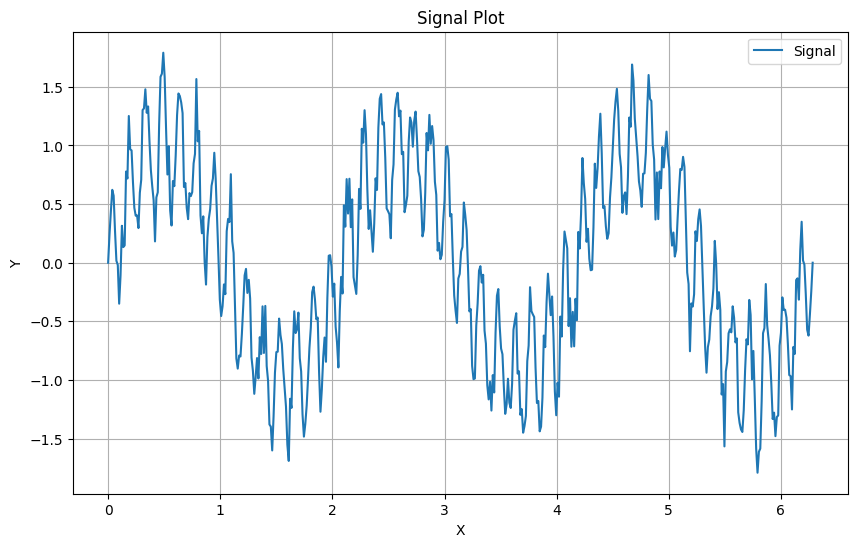

In [ ]:
import pickle
import matplotlib.pyplot as plt

file_path = 'data/d1_ex3.pcl'  # Adjust the path to your file

# Open the file and load its contents
with open(file_path, 'rb') as file:
    data = pickle.load(file)

# Assuming 'x' and 'y' represent the coordinates or signal values to be plotted
x_values = data.get("x")
y_values = data.get("y")

# Plotting the signal
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label="Signal")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Signal Plot")
plt.legend()
plt.grid(True)
plt.show()

b) Filtrez ensuite le signal en retirant la moitié des hautes fréquences et reconstruisez le. Affichez le signal reconstruit.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the signal is either under 'x', 'y', or another key in the dictionary
# Checking if a common signal key exists and extracting it
signal = data.get("signal", np.array([]))  # Fallback to an empty array if no common key

# If the signal key is not directly found, let's check if 'x' or 'y' could be the signal
if len(signal) == 0:
    if "x" in data:
        signal = np.array(data["x"])
    elif "y" in data:
        signal = np.array(data["y"])
    else:
        # If no appropriate key is found, we'll need further instructions on which key to use
        signal = None

# Proceed if we have a signal
if signal is not None:
    # Calculate the DFT for the signal
    dft = np.fft.fft(signal)
    freqs = np.fft.fftfreq(signal.size)

    # Limit to the first 64 frequencies
    dft_64 = dft[:64]
    freqs_64 = freqs[:64]

c) Expliquez comment vous pourriez adapter votre méthode pour effectuer une transformée de Fourier 2D.

TODO


## Références

### TODO

# OTHER

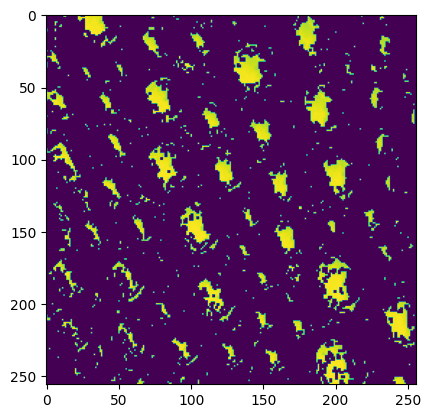

In [ ]:

# Example usage 3X3 matrix
filter_matrix_3X3 = np.array([[0, 0, 0],
                              [1, 0, -1],
                              [0, 0, 0]])  # Example filter (edge detection)

output_3X3 = apply_filter("data/d1_ex2.png", filter_matrix_3X3, "constant")

img = np.array(output_3X3)

# Flatten the image to a 1D array
pixels = img.flatten()

# Calculate the 90th percentile value
percentile_80 = np.percentile(pixels, 50)

# Set pixels with intensity above the 90th percentile to a specific value
# e.g., setting them to 0 (black)
thresholded_image = np.where(img < percentile_80, 0, img)

# Replace the image in 2d
thresholded_image = thresholded_image.reshape(image.shape)

# Define the kernel size and shape
kernel_size = (2, 2)  # Example size, adjust as needed
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)

# Apply erosion
eroded_image = cv2.erode(thresholded_image, kernel, iterations=1)  # Adjust iterations as needed

# Flatten the image to a 1D array
pixels = eroded_image.flatten()

# Calculate the 90th percentile value
percentile_80 = np.percentile(pixels, 90)

# Set pixels with intensity above the 90th percentile to a specific value
# e.g., setting them to 0 (black)
thresholded_image = np.where(eroded_image < percentile_80, 0, eroded_image)

# Replace the image in 2d
thresholded_image = thresholded_image.reshape(image.shape)


plt.imshow(thresholded_image)
plt.show()


0.6954057814623948 {'param1': 50, 'param2': 1}
0.67590305284831 {'param1': 50, 'param2': 5}
0.5891219809617394 {'param1': 50, 'param2': 10}
0.3853873977300411 {'param1': 50, 'param2': 20}
0.15024680717587743 {'param1': 50, 'param2': 30}
0.6954057814623948 {'param1': 100, 'param2': 1}
0.67590305284831 {'param1': 100, 'param2': 5}
0.5891219809617394 {'param1': 100, 'param2': 10}
0.3853873977300411 {'param1': 100, 'param2': 20}
0.15024680717587743 {'param1': 100, 'param2': 30}
0.6954057814623948 {'param1': 150, 'param2': 1}
0.67590305284831 {'param1': 150, 'param2': 5}
0.5891219809617394 {'param1': 150, 'param2': 10}
0.3853873977300411 {'param1': 150, 'param2': 20}
0.15024680717587743 {'param1': 150, 'param2': 30}
0.6954057814623948 {'param1': 200, 'param2': 1}
0.67590305284831 {'param1': 200, 'param2': 5}
0.5891219809617394 {'param1': 200, 'param2': 10}
0.3853873977300411 {'param1': 200, 'param2': 20}
0.15024680717587743 {'param1': 200, 'param2': 30}
Best parameters :  {'param1': 200, 'p

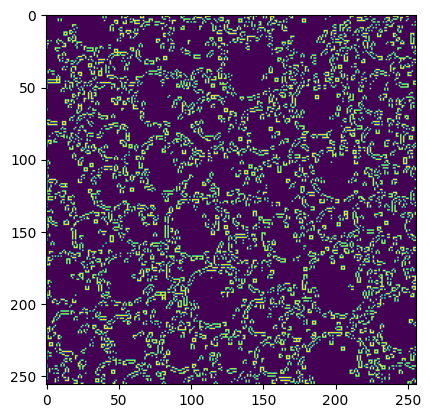

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# image_path, dp, minDist, min_radius, max_radius, param1_range, param2_range
def find_best_hough_params(gray, params, annotations):

    best_params = {
      'dp':dp_range,
      'minDist':minDist_range,
      'min_radius':min_radius_range,
      'max_radius':max_radius_range,
      'param1_range':param1_range,
      'param2_range':param2_range
    }
    global best_score

    # Iterate over the parameter ranges and find the best
    for i, param1 in enumerate(params.get("param1_range")):
        for j, param2 in enumerate(params.get("param2_range")):
            # Call the function with the path to your uploaded image
            preprocessed_image = preprocess_image(gray)

            # Detect circles
            auto_points = detect_circle(preprocessed_image, {"param1" : param1, "param2" : param2})

            score = calculate_alignment_score(np.array(annotations) , np.array(auto_points))
            print(score, {"param1" : param1, "param2" : param2})
            # Save best parameters
            if score > best_score :
              best_params =  { 'param1': param1, 'param2': param2 }
              best_score = score

    return best_params

# Define the parameter ranges to test
param1_range = [50, 100, 150, 200]
param2_range = [1, 5, 10, 20, 30]
max_radius_range = [0,1,10,100]
min_radius_range = [0,1,10,100]
minDist_range = [0,30,60,100]
dp_range = [1,2,5,10,100]

# Call the function with the path to your image and the parameters
params = {
    'dp':dp_range,
    'minDist':minDist_range,
    'min_radius':min_radius_range,
    'max_radius':max_radius_range,
    'param1_range':param1_range,
    'param2_range':param2_range
  }
best_parameters = find_best_hough_params(gray_image, params, annotations)
print("Best parameters : ", best_parameters)


In [ ]:
from scipy.optimize import linear_sum_assignment
from scipy.spatial.distance import cdist
import numpy as np

def calculate_alignment_score(hand_annotations, auto_annotations):
    # Create the cost matrix from all pairs of points
    cost_matrix = cdist(hand_annotations, auto_annotations, 'euclidean')

    # If the number of points differs, pad the cost matrix with a large distance
    max_distance = np.max(cost_matrix) * 2  # Setting a high cost for dummy pairings
    if cost_matrix.shape[0] != cost_matrix.shape[1]:
        # Create a square matrix with the larger size of the two sets
        max_size = max(cost_matrix.shape)
        square_matrix = max_distance * np.ones((max_size, max_size))
        # Place the original cost matrix in the top-left corner
        square_matrix[:cost_matrix.shape[0], :cost_matrix.shape[1]] = cost_matrix
        cost_matrix = square_matrix

    # Solve the assignment problem using the Hungarian algorithm
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    # Retrieve the distances for the optimal assignment
    optimal_distances = cost_matrix[row_ind, col_ind]

    # Normalize distances to a score between 0 and 1, where 1 is a perfect match
    # We use only the distances from the original cost matrix for normalization
    original_max_distance = np.max(cdist(hand_annotations, auto_annotations, 'euclidean'))
    scores = 1 - (optimal_distances / original_max_distance)

    # Ignore dummy points by setting their score to 0
    scores[scores < 0] = 0

    # Calculate the average score for the real points only
    real_points_count = min(len(hand_annotations), len(auto_annotations))
    alignment_score = np.sum(scores[:real_points_count]) / real_points_count

    return alignment_score

# Example usage:
# hand_points = np.array(annotations)
# auto_points = np.array(auto_points)

# score = calculate_alignment_score(hand_points, auto_points)
# print(score)

# plot_image_with_annotations(image, annotations, 'hand written annotations')
# plot_image_with_annotations(image, auto_points, 'auto annotations')

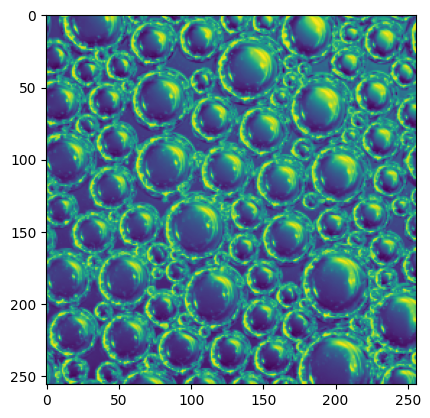

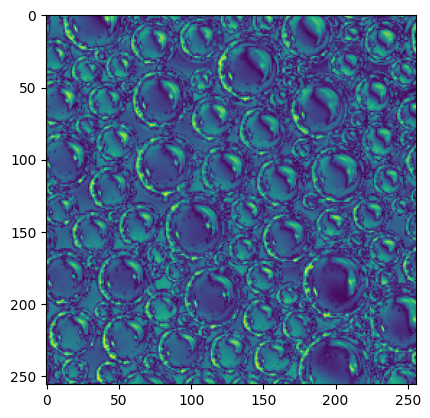

In [ ]:
import numpy as np
import cv2

# Function to apply a low-pass filter using FFT
def fft_low_pass_filter(image, cutoff_frequency_ratio):
    # Perform the FFT
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)

    # Get the magnitude spectrum (for visualization if needed)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))

    # Create a mask with high value (1) at low frequency and low value (0) at high frequency
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2  # Center of the frequency spectrum
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow - int(crow * cutoff_frequency_ratio):crow + int(crow * cutoff_frequency_ratio),
         ccol - int(ccol * cutoff_frequency_ratio):ccol + int(ccol * cutoff_frequency_ratio)] = 1

    # Apply mask to the shifted FFT
    fshift = fshift * mask

    # Inverse FFT to get the image back to the spatial domain
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    return img_back #, magnitude_spectrum

# Function to apply a high-pass filter using FFT
def fft_high_pass_filter(image, cutoff_frequency_ratio):
    # Perform the FFT
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)

    # Create a mask with low value (0) at low frequency and high value (1) at high frequency
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2  # Center of the frequency spectrum
    mask = np.ones((rows, cols), np.uint8)
    mask[crow - int(crow * cutoff_frequency_ratio):crow + int(crow * cutoff_frequency_ratio),
         ccol - int(ccol * cutoff_frequency_ratio):ccol + int(ccol * cutoff_frequency_ratio)] = 0

    # Apply mask to the shifted FFT
    fshift = fshift * mask

    # Inverse FFT to get the image back to the spatial domain
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    return img_back


# Read the image in grayscale
image = cv2.imread('data/d1_ex2.png', 0)
# Apply FFT-based low-pass filter
# The cutoff_frequency_ratio is a parameter that determines the size of the passband
cutoff_frequency_ratio = 0.2  # Keeping 10% of the frequency components
fft_low_pass_filtered_image = fft_low_pass_filter(image, cutoff_frequency_ratio)

# Normalize the image for display
fft_low_pass_filtered_image_normalized = cv2.normalize(fft_low_pass_filtered_image, None, 0, 255, cv2.NORM_MINMAX)

# Apply FFT-based high-pass filter
# The cutoff_frequency_ratio is a parameter that determines the size of the stopband
cutoff_frequency_ratio = 0.05  # Blocking the central 10% of the frequency components
fft_high_pass_filtered_image = fft_high_pass_filter(image, cutoff_frequency_ratio)

# Normalize the image for display
fft_high_pass_filtered_image_normalized = cv2.normalize(fft_high_pass_filtered_image, None, 0, 255, cv2.NORM_MINMAX)

plt.imshow(image)
plt.show()

plt.imshow(fft_low_pass_filtered_image_normalized)
plt.show()

plt.imshow(fft_high_pass_filtered_image_normalized)
plt.show()
# Save the FFT low-pass filtered image
# output_fft_low_pass_path = '/mnt/data/fft_low_pass_filtered_image.png'
# cv2.imwrite(output_fft_low_pass_path, fft_filtered_image_normalized)

# output_fft_low_pass_path

0.7674980117057629


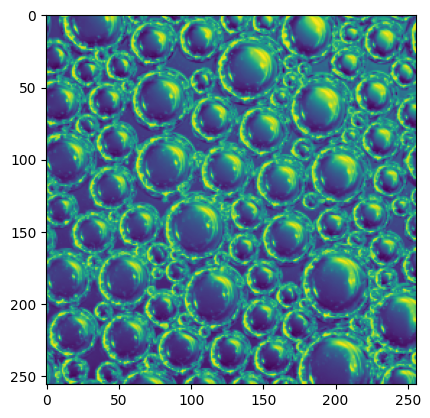

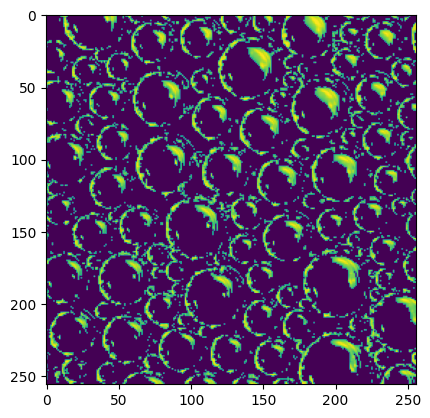

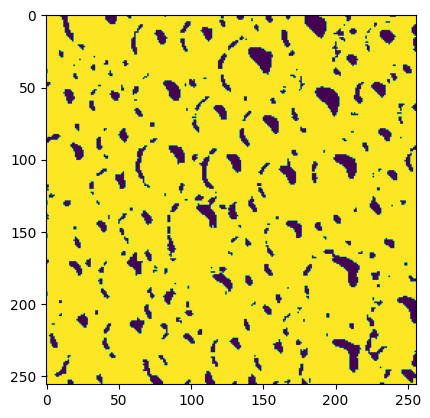

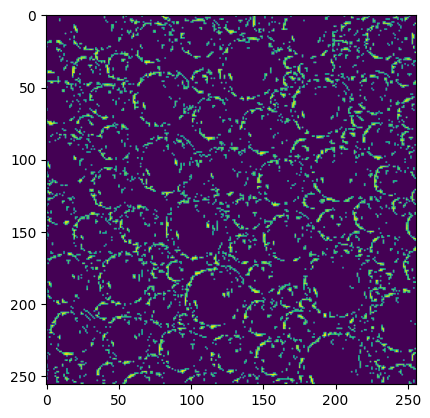

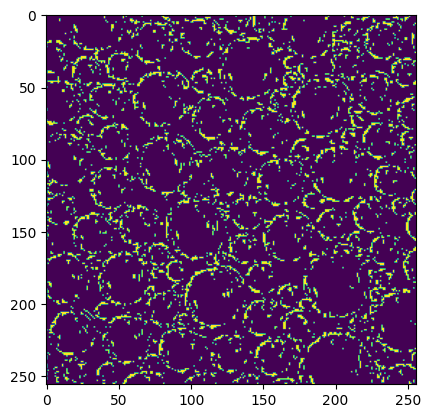

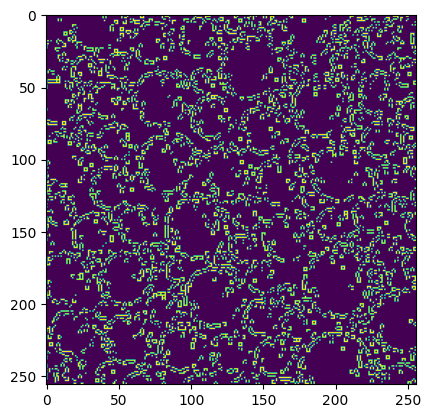

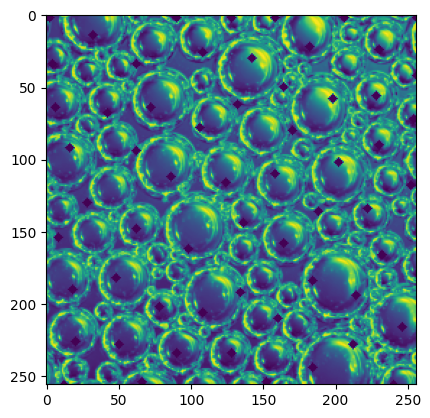

In [ ]:
import cv2
import numpy as np

# Read the image in grayscale
image = cv2.imread('data/d1_ex2.png', 0)

# Flatten the image to a 1D array
pixels = image.flatten()

# Calculate the 90th percentile value
percentile_90 = np.percentile(pixels, 80)

# Set pixels with intensity above the 90th percentile to a specific value
# e.g., setting them to 0 (black)
thresholded_image = np.where(image < percentile_90, 0, image)

# Replace the image in 2d
thresholded_image = thresholded_image.reshape(image.shape)

blurred_image = cv2.medianBlur(thresholded_image, 5)

# Apply blurred mask onto thresholded_image
_, binary_image = cv2.threshold(blurred_image, 0, 1, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
binary_image = 1 - binary_image

# Apply binary mask onto thresholded_image
filtered_image = thresholded_image * binary_image

# Sharpen image
kernel = np.array([[0, -1, 0],
                  [-1, 7, -1],
                  [0, -1, 0]])
sharpened = cv2.filter2D(filtered_image, -1, kernel)

edges = cv2.Canny(sharpened, 250, 255)

# Circle detection
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=30,
                            param1=50,
                            param2=1,
                            minRadius=0, maxRadius=0)

# Circle detection
processed_image = image.copy()
auto_points = []
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        # cv2.circle(image, (x, y), r, (0, 255, 0), 4)
        auto_points.append((x,y))
        cv2.circle(processed_image, (x, y), 1, (0, 0, 255), 3)


hand_points = np.array(annotations)
auto_points = np.array(auto_points)
score = calculate_alignment_score(hand_points, auto_points)
print(score)

plt.imshow(image)
plt.show()
plt.imshow(thresholded_image)
plt.show()
plt.imshow(binary_image)
plt.show()
plt.imshow(filtered_image)
plt.show()
plt.imshow(sharpened)
plt.show()
plt.imshow(edges)
plt.show()
plt.imshow(processed_image)
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_and_plot_image(image_path):
    # Load the image
    original_image = cv2.imread(image_path)
    image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (9, 9), 0)

    # Edge detection
    edges = cv2.Canny(blurred, 140, 255)

    # Dilate the edges
    dilated_edges = cv2.dilate(edges, None)

    # Circle detection
    circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=30,
                               param1=50, param2=30, minRadius=0, maxRadius=0)

    # Plotting
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))

    # Original image
    axs[0].imshow(image)
    axs[0].set_title("Original Image")
    axs[0].axis('off')

    # Blurred image
    axs[1].imshow(blurred, cmap='gray')
    axs[1].set_title("Blurred Image")
    axs[1].axis('off')

    # Edge detection
    axs[2].imshow(edges, cmap='gray')
    axs[2].set_title("Edge Detection")
    axs[2].axis('off')

    # Circle detection
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            # cv2.circle(image, (x, y), r, (0, 255, 0), 4)
            cv2.circle(image, (x, y), 1, (0, 0, 255), 3)

    axs[3].imshow(image)
    axs[3].set_title("Circle Detection")
    axs[3].axis('off')

    plt.show()

# Call the function with the path to your uploaded image
process_and_plot_image('data/d1_ex2.png')


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_and_plot_image(image_path):
    # Load the image
    original_image = cv2.imread(image_path)
    image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Circle detection
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=25,
                               param1=50, param2=30, minRadius=0, maxRadius=0)

    # Plotting
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Original image
    axs[0].imshow(image)
    axs[0].set_title("Original Image")
    axs[0].axis('off')

    auto_points = []
    # Circle detection
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            cv2.circle(image, (x, y), r, (0, 255, 0), 4)
            cv2.circle(image, (x, y), 1, (0, 0, 255), 3)
            auto_points.append((x, y))

    axs[1].imshow(image)
    axs[1].set_title("Circle Detection")
    axs[1].axis('off')

    plt.show()

    return auto_points

# Call the function with the path to your uploaded image
auto_points = process_and_plot_image('data/d1_ex2.png')
print(auto_points)


In [ ]:
import numpy as np
import cv2
from scipy import signal

# Load the image
image = cv2.imread('data/d1_ex2.png', cv2.IMREAD_GRAYSCALE)

# Create or select a template (for illustration, create a circular template)
radius = 10  # Estimate based on the size of bubbles in your image
template = np.zeros((radius*2+1, radius*2+1), dtype=np.uint8)
cv2.circle(template, (radius, radius), radius, 255, -1)

# Correlate the template with the image
correlation = signal.correlate2d(image, template, boundary='fill', mode='same')

# Normalize the correlation image for display
correlation = (correlation - np.min(correlation)) / (np.max(correlation) - np.min(correlation))

# Threshold to identify peaks
threshold = 0.5  # This is a relative threshold, adjust as necessary

# Find local maxima
centers = []
for y in range(radius, correlation.shape[0] - radius):
    for x in range(radius, correlation.shape[1] - radius):
        # Define the neighborhood
        neighborhood = correlation[y-radius:y+radius+1, x-radius:x+radius+1]

        # Check if the current pixel is the local maximum and above the threshold
        if correlation[y, x] == np.max(neighborhood) and correlation[y, x] > threshold:
            centers.append((x, y))
            # Optional: suppress the nearby region to avoid multiple detections for the same bubble
            correlation[y-radius:y+radius+1, x-radius:x+radius+1] = 0

# Draw the centers on the image
for center in centers:
    cv2.circle(image, center, 2, (0, 255, 0), -1)

# Save the output image with the detected centers
output_path = 'data/bubble_centers_detected.png'
cv2.imwrite(output_path, image)

# Provide the path to the saved image
output_path

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a standard test image from OpenCV
image = cv2.imread('data/d1_ex2.png', cv2.IMREAD_GRAYSCALE)

# Apply Fourier transform
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# Flatten the fshift array and find absolute values
fshift_flat = fshift.flatten()
fshift_magnitudes = np.abs(fshift_flat)

# Sort and find the threshold for the top 10%
sorted_magnitudes = np.sort(fshift_magnitudes)
threshold_low = sorted_magnitudes[int(len(sorted_magnitudes) * 0.90)]  # 90% threshold for top 10%
threshold_high = sorted_magnitudes[int(len(sorted_magnitudes) * 0.99)]

# Find the indices of the top 10% values
top_percent_indices = np.where((fshift_magnitudes > threshold_low) & (fshift_magnitudes < threshold_high))

# Optional: Create a mask to visualize these top 10% values
top_percent_mask = np.zeros_like(fshift, dtype=np.uint8)
top_percent_mask = top_percent_mask.flatten()
top_percent_mask[top_percent_indices] = 1
top_percent_mask = top_percent_mask.reshape(fshift.shape)

# Visualizing the mask
plt.figure(figsize=(6, 6))
plt.imshow(np.log1p(np.abs(top_percent_mask)), cmap='gray')  # Log scale for better visualization
plt.title('Top 10% Highest Frequency Components'), plt.xticks([]), plt.yticks([])
plt.show()

# Invert the mask to keep high frequencies
mask = top_percent_mask

# Apply the mask on the magnitude spectrum for visualization
masked_spectrum = magnitude_spectrum * mask

# Apply mask and inverse DFT
fshift = fshift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Plotting the original and transformed image
plt.figure(figsize=(12, 6))
plt.subplot(231), plt.imshow(image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(233), plt.imshow(masked_spectrum, cmap='gray')
plt.title('Masked Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(234), plt.imshow(img_back, cmap='gray')
plt.title('Image after Keeping High Frequencies'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# image_path, dp, minDist, min_radius, max_radius, param1_range, param2_range
def find_best_hough_params(image_path, hough_circles_params, annotations):
    dp, minDist, min_radius, max_radius, param1_range, param2_range = hough_circles_params.values()
    original_image = cv2.imread(image_path)
    gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    fig, axs = plt.subplots(len(param1_range), len(param2_range), figsize=(20, 20))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    best_params = {
        'param1': 0,
        'param2': 0,
        'score': 0
    }

    # Iterate over the parameter ranges and find the best
    for i, param1 in enumerate(param1_range):
        for j, param2 in enumerate(param2_range):
            circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=dp, minDist=minDist,
                                       param1=param1, param2=param2, minRadius=min_radius, maxRadius=max_radius)
            image = original_image.copy()
            auto_points = []
            if circles is not None:
                circles = np.round(circles[0, :]).astype("int")
                for (x, y, r) in circles:
                    cv2.circle(image, (x, y), r, (0, 255, 0), 2)
                    cv2.circle(image, (x, y), 2, (0, 0, 255), 3)
                    auto_points.append((x, y))

            score = calculate_alignment_score(np.array(annotations) , np.array(auto_points))

            # Save best parameters
            if score > best_params.get("score", 0) :
              best_params =  { 'param1': param1, 'param2': param2, 'score': score }

            axs[i, j].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            axs[i, j].set_title(f'score : {score:.2f} param1: {param1}, param2: {param2}')
            axs[i, j].axis('off')

    plt.show()
    return best_params

# Define the parameter ranges to test
param1_range = [50, 100, 150, 200]
param2_range = [30, 35, 40, 45]

# Call the function with the path to your image and the parameters
hough_circles_params = {
    'dp':1,
    'minDist':30,
    'min_radius':0,
    'max_radius':0,
    'param1_range':param1_range,
    'param2_range':param2_range
  }
best_parameters = find_best_hough_params('data/d1_ex2.png', hough_circles_params, annotations)
print("Best parameters : ", best_parameters)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(gray, hough_circles_params):

    global gray_image
    global sharpened
    global thresh
    global edges
    global processed_image

    gray_image = gray

    # Pre-processing with Gaussian Blur
    # blurred_image = cv2.GaussianBlur(gray, (5, 5), 0)

    # Sharpen image
    kernel = np.array([[0, -1, 0],
                      [-1, 5, -1],
                      [0, -1, 0]])
    sharpened = cv2.filter2D(gray, -1, kernel)

    # Flatten the image to a 1D array
    pixels = sharpened.flatten()

    # Calculate the 90th percentile value
    percentile_80 = np.percentile(pixels, 80)

    # Set pixels with intensity above the 90th percentile to a specific value
    # e.g., setting them to 0 (black)
    thresholded_image = np.where(sharpened < percentile_80, 0, sharpened)

    # Replace the image in 2d
    thresholded_image = thresholded_image.reshape(image.shape)

    # Apply Otsu's thresholding
    # ret, thresh = cv2.threshold(sharpened, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Edge detection
    edges = cv2.Canny(thresholded_image, 250, 255)

    # Circle detection
    circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=30,
                               param1=hough_circles_params.get("param1"),
                               param2=hough_circles_params.get("param2"),
                               minRadius=0, maxRadius=0)

    # Circle detection
    auto_points = []
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            # cv2.circle(image, (x, y), r, (0, 255, 0), 4)
            auto_points.append((x,y))
            cv2.circle(processed_image, (x, y), 1, (0, 0, 255), 3)

    return auto_points

def plot_images(gray_image, sharpened, edges, processed_image) :
    # Plotting
    fig, axs = plt.subplots(2, 3, figsize=(20, 5))

    # Original image
    axs[0][0].imshow(gray_image)
    axs[0][0].set_title("Original Image")
    axs[0][0].axis('off')

    # Blurred image
    axs[0][1].imshow(sharpened, cmap='gray')
    axs[0][1].set_title("Sharpened  Image")
    axs[0][1].axis('off')

    # Blurred image
    axs[0][2].imshow(thresholded_image, cmap='gray')
    axs[0][2].set_title("Otsu Thresh Image")
    axs[0][2].axis('off')

    # Edge detection
    axs[1][0].imshow(edges, cmap='gray')
    axs[1][0].set_title("Kanni Edge Detection")
    axs[1][0].axis('off')

    axs[1][1].imshow(processed_image)
    axs[1][1].set_title("Circle Detection")
    axs[1][1].axis('off')

    plt.show()

# Load the image
original_image = cv2.imread('data/d1_ex2.png')
processed_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib
gray = cv2.cvtColor(processed_image, cv2.COLOR_RGB2GRAY)

# Set Hough Params
hough_circles_params = {
    'dp':1,
    'minDist':30,
    'min_radius':0,
    'max_radius':0,
    'param1':50,
    'param2':30
  }

# Call the function with the path to your uploaded image
auto_points = process_image(gray, hough_circles_params)

# Plot images
plot_images(gray_image, sharpened, edges, processed_image)

hand_points = np.array(annotations)
auto_points = np.array(auto_points)
score = calculate_alignment_score(hand_points, auto_points)
print(score)